# ML4NLP1
## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is o make you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- Numpy: [Documentation](https://numpy.org/doc/)

**Importing files to Google Colab:** If you have never used Colab or never uploaded a file to Colab, quickly skim over an introduction: [Introduction on medium](https://medium.com/@master_yi/importing-datasets-in-google-colab-c816fc654f97).

We're using the second method mentioned in the blogpost: (1) upload the four files `x_train.txt` and `y_train.txt`, `x_test.txt` and `y_test.txt` to a directory in Google Drive and (2) adjust the paths in the second cell to point to your uploaded files.

Then execute the first cell to give Colab permission to access the two files.

## 1. Data Reading
Read, open, and combine data to dataframe


In [ ]:
import pandas as pd
import numpy as np
import csv
import re
import string
from collections import defaultdict

In [ ]:
import subprocess

# Installation on Google Colab
try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'eli5'])
except ImportError:
    pass

In [ ]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:01<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:01<00:00, 47.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 52.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 85.7MB/s]


In [ ]:
# open datasets
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})

## Exploring data
Understanding structure and identifying pontential difficulties in the data.

In [ ]:
# print list of all unique labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'

In [ ]:
# T: Have a quick peek at the training data, looking at a couple of texts from different languages. Do you notice anything that might be challenging for the classification?

#The texts contain a lot of names from other languages (Example 5), which could be misinterpreted by the language model
print('Example non-native words:', train_df.text.loc[4504])

print("----------------")

#Another large problem is that the database also includes dialects which can be similar to the original language. E.g German, Alsatian and Bavarian (all German dialects) are included (Example 6)
print('Example Bavarian:', train_df.text.loc[116976])
print('Example Alsatian: ',train_df.text.loc[90522])
print('Example: Standard German',train_df.text.loc[1204])

Example non-native words: Nangal Jiwan is a village in Nakodar in Jalandhar district of Punjab State, India. It is located 5.5 kilometres (3.4 mi) from Nakodar, 36.5 kilometres (22.7 mi) from Kapurthala, 21 kilometres (13 mi) from district headquarter Jalandhar and 159 kilometres (99 mi) from state capital Chandigarh. The village is administrated by a sarpanch who is an elected representative of village as per Panchayati raj (India).
----------------
Example Bavarian: In da nohn Umgebung vom Stodzentrums befindn si via weidane Stodbezirke. De san zwischn 1988 und 1992 vo Kroasn in Stodbezirke umgwandlt woan:
Example Alsatian:  De Flughafe ligt bi Tan-Binh im sächste Stadtbezirk vo Ho-Chi-Minh-Stadt, 7 km vom Stadtzentrum entfernt. Er befindet sich im Bsitz vom vietnamesische Staat.
Example: Standard German Im Verlauf der Auseinandersetzungen mit den Ständen war Dietrich versucht, auf das Amt zu verzichten und es wurde geplant, einen Koadjutor zu bestimmen. Insgeheim wurde dafür einer d

In [ ]:
# T: How many instances per label are there in the training and test set? Do you think this is a balanced dataset? Do you think the train/test split is appropriate? If not, please rearrange the data in a more appropriate way.
# Answer: the panels is well balanced, since there are 500 texts for each language. However it is unusual to use a 50:50 split between test and training set.  We split the data to a 70:30 (training:test) split
print("Initial training dataset number of texts per language: ")
print(train_df.groupby('label').count())
print("--------------------------")
print("Initial test dataset number of texts per language: ")
print(test_df.groupby('label').count())


Initial training dataset number of texts per language: 
        text
label       
ace      500
afr      500
als      500
amh      500
ang      500
...      ...
yid      500
yor      500
zea      500
zh-yue   500
zho      500

[235 rows x 1 columns]
--------------------------
Initial test dataset number of texts per language: 
        text
label       
ace      500
afr      500
als      500
amh      500
ang      500
...      ...
yid      500
yor      500
zea      500
zh-yue   500
zho      500

[235 rows x 1 columns]


In [ ]:
#changing 50:50 split to 70:30 split. Code to combine test and training df and split it balanced 70:30 split - Code for combining and splitting data generated by ChatGPT.
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Combine train_df and test_df into one dataframe
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Step 2: Group by label and split into training and testing while maintaining label balance
def split_data_by_label(data):
    grouped = data.groupby('label')
    train_data, test_data = [], []

    for label, group in grouped:
        group_train, group_test = train_test_split(group, test_size=0.3, random_state=42)
        train_data.append(group_train)
        test_data.append(group_test)

    train_df_balanced = pd.concat(train_data, ignore_index=True)
    test_df_balanced = pd.concat(test_data, ignore_index=True)

    return train_df_balanced, test_df_balanced

# Split the combined data
train_df_balanced, test_df_balanced = split_data_by_label(combined_df)

print("New split training dataset number of texts per language: ")
print(train_df_balanced.groupby('label').count())
print("--------------------------")
print("New split test dataset number of texts per language: ")
print(test_df_balanced.groupby('label').count())

New split training dataset number of texts per language: 
        text
label       
ace      700
afr      700
als      700
amh      700
ang      700
...      ...
yid      700
yor      700
zea      700
zh-yue   700
zho      700

[235 rows x 1 columns]
--------------------------
New split test dataset number of texts per language: 
        text
label       
ace      300
afr      300
als      300
amh      300
ang      300
...      ...
yid      300
yor      300
zea      300
zh-yue   300
zho      300

[235 rows x 1 columns]


In [ ]:
# T: Get a subset of the train/test data that includes English, German, Dutch, Danish, Swedish and Norwegian, plus 20 additional languages of your choice (the labels can be found in the file labels.csv)

#Make a list of languages to include.
language_list=['eng', 'deu', 'nld', 'dan', 'swe', 'nob','jpn','bos', 'ces', 'cat', 'ell', 'epo', 'est', 'eus', 'fin', 'fra', 'gle', 'hbs', 'hye', 'lat', 'lav', 'ltz', 'mkd', 'pol',  'ron', 'ita']
test_df_subset=test_df_balanced[test_df_balanced.label.isin(language_list)]
train_df_subset=train_df_balanced[train_df_balanced.label.isin(language_list)]

In [ ]:
# T: With the following code, we wanted to encode the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

#extract y_train and y_test from original df
y_train=train_df_subset['label']
y_test=test_df_subset['label']

x_train=train_df_subset['text']
x_test=test_df_subset['text']

#encode y labels
label_encoder=LabelEncoder()
le_fitted = label_encoder.fit(y_train)
y_train = le_fitted.transform(y_train)
y_test = le_fitted.transform(y_test)

In [ ]:
le_fitted

LabelEncoder()

### Setting up the Model
Defining class for extracting more language features and finding best hyperparameters

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk import word_tokenize
from nltk import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Class that counts number of verbs and nouns and average sentence length
class SentenceStatsExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, turn_on=True):
        self.turn_on = turn_on

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.turn_on==True:


          #initialise list for number of verbs per sentence and setnence length
          verb_counts = []
          noun_counts = []
          sentence_lengths = []

          for text in X:
              #split sentences
              sentences = nltk.sent_tokenize(text)
              num_sentences = len(sentences)
              total_sentence_length = 0
              total_nouns = 0
              total_verbs = 0

              for sentence in sentences:
                  # divide string in list of substrings
                  words = word_tokenize(sentence)

                  #tag the words using nltk package
                  tags = pos_tag(words)

                  #count number of nouns and verbs
                  noun_count = len([word for word, tag in tags if tag.startswith('N')])
                  verb_count = len([word for word, tag in tags if tag.startswith('V')])

                  #add up total number of sentences, nouns and verbs
                  total_sentence_length += len(words)
                  total_nouns += noun_count
                  total_verbs += verb_count


              average_sentence_length = total_sentence_length / num_sentences
              verb_counts.append(total_verbs)
              noun_counts.append(total_nouns)
              sentence_lengths.append(average_sentence_length)


          return list(zip(verb_counts, noun_counts, sentence_lengths))
        # if the extra features are not wanted, return counts of 0 for each feature
        else:
          num_samples = len(X)
          return [(0, 0, 0)] * num_samples


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk import word_tokenize
from nltk import pos_tag




# initiate self written class
sentence_stats_extractor=SentenceStatsExtractor()

#pipeline for extracting additional language features
sentence_stat_pipe=Pipeline([
    ('sentence_stats', sentence_stats_extractor),
    ('scaler', MinMaxScaler())
])

count_vectorizer_pipe=Pipeline([
    ('vect_count', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

#pipeline that combines text vectorizer with self written class and computes Logistic Regression
text_clf = Pipeline([
    ('features', FeatureUnion([
        ('vect_word', count_vectorizer_pipe),
        ('sentence_stats', sentence_stat_pipe)
    ])),
    ('logreg', LogisticRegression())
])

param_grid = {
    'features__vect_word__vect_count__ngram_range': [(1, 1), (1, 2)],
    'features__sentence_stats__sentence_stats__turn_on': [True, False],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['saga', 'liblinear']
}



gs_logreg = GridSearchCV(text_clf, param_grid, cv=2, verbose=1)
gs_logreg.fit(x_train,y_train)



Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('vect_word',
                                                                        Pipeline(steps=[('vect_count',
                                                                                         CountVectorizer()),
                                                                                        ('tfidf',
                                                                                         TfidfTransformer())])),
                                                                       ('sentence_stats',
                                                                        Pipeline(steps=[('sentence_stats',
                                                                                         SentenceStatsExtractor()),
                                                                                        ('scaler',
                                                                                         MinMaxScaler())]))])),
                                       ('logreg', LogisticRegression())]),
             param_grid={'features__sentence_stats__sentence_stats__turn_on': [True,
                                                                               False],
                         'features__vect_word__vect_count__ngram_range': [(1,
                                                                           1),
                                                                          (1,
                                                                           2)],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['saga', 'liblinear']},
             verbose=1)

In [ ]:
#l2 penalty leads to better results and faster solution times. L2 penality with saga solver is faster than L2 penalty with liblinear solver
logreg_df = pd.DataFrame.from_dict(gs_logreg.cv_results_)
logreg_df.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_features__sentence_stats__sentence_stats__turn_on,param_features__vect_word__vect_count__ngram_range,param_logreg__penalty,param_logreg__solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
10,3.018683,0.031336,0.373980,0.007803,False,"(1, 1)",l2,saga,{'features__sentence_stats__sentence_stats__tu...,0.949890,0.949560,0.949725,0.000165,1
2,35.879283,1.460136,31.251422,0.417283,True,"(1, 1)",l2,saga,{'features__sentence_stats__sentence_stats__tu...,0.949121,0.947802,0.948462,0.000659,2
14,8.209857,0.120047,0.911976,0.107978,False,"(1, 2)",l2,saga,{'features__sentence_stats__sentence_stats__tu...,0.947033,0.949341,0.948187,0.001154,3
6,40.949439,1.414373,31.631005,0.046169,True,"(1, 2)",l2,saga,{'features__sentence_stats__sentence_stats__tu...,0.947363,0.948901,0.948132,0.000769,4
11,3.153864,0.321782,0.409824,0.006912,False,"(1, 1)",l2,liblinear,{'features__sentence_stats__sentence_stats__tu...,0.948242,0.947143,0.947692,0.000549,5
3,33.666330,0.113963,30.816156,0.271039,True,"(1, 1)",l2,liblinear,{'features__sentence_stats__sentence_stats__tu...,0.948242,0.946264,0.947253,0.000989,6
15,10.089276,0.306386,0.794703,0.011830,False,"(1, 2)",l2,liblinear,{'features__sentence_stats__sentence_stats__tu...,0.946154,0.946044,0.946099,0.000055,7
7,40.699138,0.136866,31.621586,0.241742,True,"(1, 2)",l2,liblinear,{'features__sentence_stats__sentence_stats__tu...,0.944835,0.945824,0.945330,0.000495,8
1,35.615255,0.084681,31.417429,0.090284,True,"(1, 1)",l1,liblinear,{'features__sentence_stats__sentence_stats__tu...,0.907582,0.909451,0.908516,0.000934,9
0,55.641403,2.040656,34.236140,3.836395,True,"(1, 1)",l1,saga,{'features__sentence_stats__sentence_stats__tu...,0.900000,0.900440,0.900220,0.000220,10


0.9458974358974359
0.9458974358974359
0.9458974358974359


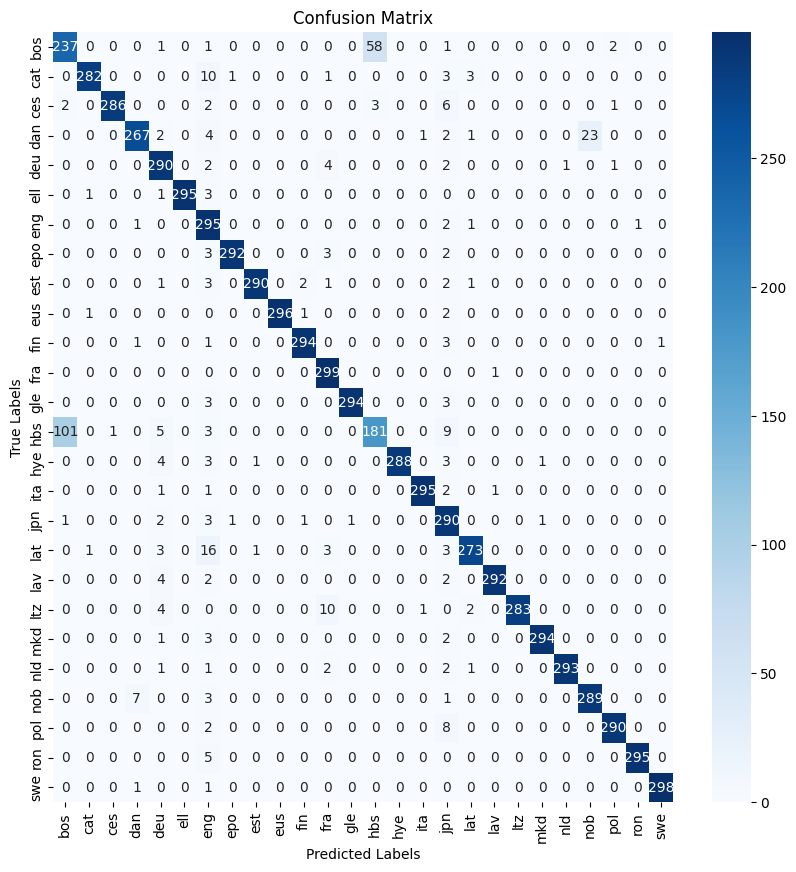

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# Re-run model with best parameters and test performance on test set
sentence_stats_extractor=SentenceStatsExtractor(turn_on=False)

sentence_stat_pipe=Pipeline([
    ('sentence_stats', sentence_stats_extractor),
    ('scaler', MinMaxScaler())
])

#number of nouns featur engineering
text_clf = Pipeline([
    ('features', FeatureUnion([
        ('vect_word', CountVectorizer(ngram_range=(1,1))),
        ('sentence_stats', sentence_stat_pipe)
    ])),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression(solver='saga', penalty='l2'))
])

# fit the model with the best parameters
text_clf.fit(x_train,y_train)

# predict labels on testset
y_test_predictions = cross_val_predict(text_clf, x_test, y_test, cv=3)

print(precision_score(y_test, y_test_predictions, average='micro'))
print(recall_score(y_test, y_test_predictions, average='micro'))
print(f1_score(y_test, y_test_predictions, average='micro'))

#set up confusion matrix
conf_mx = confusion_matrix(y_test, y_test_predictions)


#plot confusion matrix with seaborn -> Code for matrix was generated by ChatGPT
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(conf_mx, annot=True, fmt='d', cmap='Blues', xticklabels=le_fitted.classes_, yticklabels=le_fitted.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
sentence_stats_extractor=SentenceStatsExtractor(turn_on=False)

sentence_stat_pipe=Pipeline([
    ('sentence_stats', sentence_stats_extractor),
    ('scaler', MinMaxScaler())
])


text_clf = Pipeline([
    ('features', FeatureUnion([
        ('vect_word', CountVectorizer(ngram_range=(1,1))),
        ('sentence_stats', sentence_stat_pipe)
    ])),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression(solver='saga', penalty='l2'))
])

text_clf.fit(x_train, y_train)
y_pred = text_clf.predict(x_test)


# Use transformers_ for the fitted estimators.
# Code inspired by: https://gist.github.com/jantrienes/13c53b841cdb98f3aaaf5f7147df7a23
vec = text_clf[0].transformer_list[0][1]

# We cannot call pipe.get_feature_names() because the MinMaxScaler do not have feature names.
# Therefore, we append those manually.
feature_names =  np.concatenate((vec.get_feature_names_out(), ['verb_counts', 'noun_counts', 'sentence_lengths']))
# Show weights of the classifier (at index 2 in pipeline)
eli5.show_weights(text_clf[2], feature_names=feature_names, target_names =le_fitted.classes_, top=10)


In [ ]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression

# set-up Pipeline
sentence_stats_extractor_full = SentenceStatsExtractor(turn_on=False)

sentence_stat_pipe_full = Pipeline([
    ('sentence_stats', sentence_stats_extractor_full),
    ('scaler', MinMaxScaler())
])

text_clf_full = Pipeline([
    ('features', FeatureUnion([
        ('vect_word', CountVectorizer(ngram_range=(1, 1))),
        ('sentence_stats', sentence_stat_pipe_full)
    ])),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression(solver='saga', penalty='l2'))
])

# train model on full dataset (not necessary since done before)
text_clf_full.fit(x_train, y_train)
y_pred_full = text_clf_full.predict(x_test)

y_test_predictions_full = cross_val_predict(text_clf_full, x_test, y_test, cv=5)

print('The full text leads to:')
print(precision_score(y_test, y_test_predictions_full, average='micro'))
print(recall_score(y_test, y_test_predictions_full, average='micro'))
print(f1_score(y_test, y_test_predictions_full, average='micro'))
print("------------------------------------")

# take first 500 characters of each text
x_train_500 = [entry[:500] for entry in x_train]

# set up pipeline
sentence_stats_extractor_500 = SentenceStatsExtractor(turn_on=False)

sentence_stat_pipe_500 = Pipeline([
    ('sentence_stats', sentence_stats_extractor_500),
    ('scaler', MinMaxScaler())
])

text_clf_500 = Pipeline([
    ('features', FeatureUnion([
        ('vect_word', CountVectorizer(ngram_range=(1, 1))),
        ('sentence_stats', sentence_stat_pipe_500)
    ])),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression(solver='saga', penalty='l2'))
])

text_clf_500.fit(x_train_500, y_train)
y_pred_500 = text_clf_500.predict(x_test)

y_test_predictions_500 = cross_val_predict(text_clf_500, x_test, y_test, cv=5)

print('The full text leads to:')
print(precision_score(y_test, y_test_predictions_500, average='micro'))
print(recall_score(y_test, y_test_predictions_500, average='micro'))
print(f1_score(y_test, y_test_predictions_500, average='micro'))
print("------------------------------------")


# Define a pipeline for the first 100 characters
x_train_100 = [entry[:100] for entry in x_train]

sentence_stats_extractor_100 = SentenceStatsExtractor(turn_on=False)

sentence_stat_pipe_100 = Pipeline([
    ('sentence_stats', sentence_stats_extractor_100),
    ('scaler', MinMaxScaler())
])

text_clf_100 = Pipeline([
    ('features', FeatureUnion([
        ('vect_word', CountVectorizer(ngram_range=(1, 1))),
        ('sentence_stats', sentence_stat_pipe_100)
    ])),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression(solver='saga', penalty='l2'))
])

#train model
text_clf_100.fit(x_train_100, y_train)

#validate with test dataset
y_test_predictions_100 = cross_val_predict(text_clf_100, x_test, y_test, cv=5)

print('The full text leads to:')
print(precision_score(y_test, y_test_predictions_100, average='micro'))
print(recall_score(y_test, y_test_predictions_100, average='micro'))
print(f1_score(y_test, y_test_predictions_100, average='micro'))
print("------------------------------------")


The full text leads to:
0.9475641025641026
0.9475641025641026
0.9475641025641026
------------------------------------
The full text leads to:
0.9475641025641026
0.9475641025641026
0.9475641025641026
------------------------------------
The full text leads to:
0.9476923076923077
0.9476923076923077
0.9476923076923076
------------------------------------


To test when the ablation effect starts we test the accuracyof the predictions for even smaller fractions of the text

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
x=[]
y=[]

# run the pipeline for different word length
for i in [5, 10, 50, 100, 250, 500, 750]:
  sentence_stats_extractor_test=SentenceStatsExtractor()

  sentence_stat_pipe_test=Pipeline([
      ('sentence_stats', sentence_stats_extractor_test),
      ('scaler', MinMaxScaler())
  ])


  text_clf_test = Pipeline([
      ('features', FeatureUnion([
          ('vect_word', CountVectorizer(ngram_range=(1,1))),
          ('sentence_stats', sentence_stat_pipe_test)
      ])),
      ('tfidf', TfidfTransformer()),
      ('logreg', LogisticRegression(solver='saga', penalty='l2'))
  ])

  x_train_test=[entry[:i] for entry in x_train]

  text_clf_test.fit(x_train_test, y_train)
  y_pred_test = text_clf_test.predict(x_test)

  f1 = f1_score(y_test, y_pred_test, average='micro')
  print('for first ', i, 'characters, f-score is: ', f1)

  #save text length and f1 score
  x.append(i)
  y.append(f1)


for first  5 characters, f-score is:  0.627051282051282
for first  10 characters, f-score is:  0.857051282051282
for first  50 characters, f-score is:  0.9414102564102564
for first  100 characters, f-score is:  0.9457692307692308
for first  250 characters, f-score is:  0.9473076923076923
for first  500 characters, f-score is:  0.9488461538461539
for first  750 characters, f-score is:  0.948076923076923


Text(0, 0.5, 'f1 score')

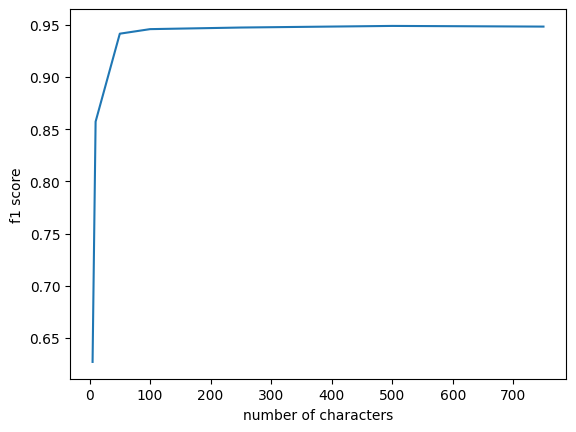

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel("number of characters")
plt.ylabel("f1 score")